In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import os
os.chdir("E:\Machine Learning\ML_Projects\Project_4_KNN")

In [27]:
%pwd

'E:\\Machine Learning\\ML_Projects\\Project_4_KNN'

In [28]:
df = pd.read_excel(r"E:\Machine Learning\ML_Projects\Project_4_KNN\Loan_applicant’s_risk.xlsx")

In [29]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [31]:
df.shape

(8995, 7)

In [32]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [33]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

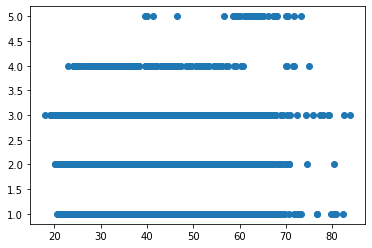

In [34]:
plt.scatter(df['Age'],df['Total Work Experience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e667d890d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e667d89670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e667e26ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e667d89c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e667d89ee0>],
 'means': []}

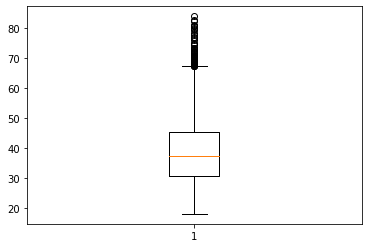

In [35]:
plt.boxplot(df["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e667dccfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e667de25b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e667dcce20>],
 'medians': [<matplotlib.lines.Line2D at 0x1e667de2b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e667de2e20>],
 'means': []}

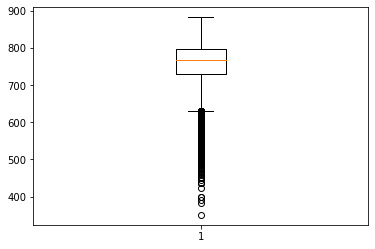

In [36]:
plt.boxplot(df['Cibil score'])

## Create a target & feature data

In [37]:
df.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months',
       'Total bounces past12months'],
      dtype='object')

In [38]:
X = df.drop('Total bounces past12months',axis=1)
Y = df['Total bounces past12months']

In [39]:
X.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,40.50,2,6,0.842666,594,0
1,41.25,5,2,0.791667,754,0
2,39.50,5,2,0.727273,779,0
3,35.00,1,4,0.820232,818,0
4,34.00,3,3,0.455581,853,0


In [40]:
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: Total bounces past12months, dtype: int64

## Working with Model

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [46]:
knn.score(X_test,Y_test)

0.6253474152306837

In [47]:
knn.score(X_train,Y_train)

0.6803779877709839

In [48]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(Y_test,y_pred)

0.6253474152306837

In [57]:
confusion_matrix(Y_test,y_pred)

array([[1110,   41,    3,    2,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 229,   14,    4,    1,    0,    1,    0,    0,    0,    0,    0,
           0,    0],
       [ 105,    7,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  71,    1,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  39,    2,    3,    0,    0,    0,    0,    0,    0,    1,    0,
           0,    0],
       [  30,    2,    1,    0,    0,    0,    0,    1,    0,    0,    0,
           0,    0],
       [  19,    2,    2,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0],
       [  23,    2,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  12,    2,    2,    1,    1,    0,    0,    1,    0,    0,    0,
           0,    0],
       [  16,    1,    0,    1,    1,    1,    0,    0,    2,    0,    0,
           0,    1],
       [   8,    2,    2,    1,    0,    1,    0, 

## Try 1 to 14 k values for classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
        model = KNeighborsClassifier(i)
        model.fit(X_train,Y_train)
        
        test_scores.append(model.score(X_train,Y_train))
        train_scores.append(model.score(X_test,Y_test))

In [52]:
import seaborn as sns

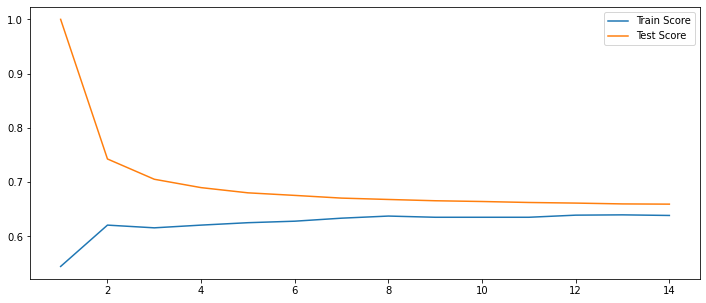

In [54]:
plt.figure(figsize=(12,5))
p= sns.lineplot(range(1,15),train_scores,markers='*',label='Train Score')
p= sns.lineplot(range(1,15),test_scores,markers='o',label='Test Score')